# Calculating breakdown voltage

Calculation steps:
  - Choose a sensor/channel+module and temperature to calculate BV
  - Load processed data from LED ON datasets for different voltages
  

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import pylars

In [37]:
import pylars.utils.output
import pylars.utils.input

#### Define the run and the processor

In [6]:
base_run = pylars.utils.input.run(
        run_number=6,
        main_data_path='/disk/gfs_atp/xenoscope/SiPMs/char_campaign/raw_data/')

In [7]:
process = pylars.processing.rawprocessor.run_processor(
        base_run, 'simple', sigma_level=5, baseline_samples=50)

In [28]:
voltages = get_voltages_available(170, base_run)

In [29]:
voltages

array([46.  , 46.25, 46.5 , 46.75, 47.  , 47.25, 47.5 , 47.75, 48.  ,
       48.25, 48.5 , 48.75, 49.  , 49.25, 49.5 , 49.75, 50.  , 50.25,
       50.5 , 50.75, 51.  , 51.25, 51.5 , 51.75, 52.  , 52.25, 52.5 ])

In [24]:
base_run.datasets[0].kind

'BV'

#### Create the processed data object and fetch the processed data

In [30]:
processed_data = pylars.utils.output.processed_dataset(
    run=base_run,
    kind='BV',
    vbias=50.75,
    temp=170,
    path_processed='/disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/',
    process_hash=process.hash)

In [8]:
processed_data.load_data()

Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_50.75-3iertgj.h5


In [31]:
processed_data.load_data?

In [10]:
processed_data.data

,module,channel,wf_number,peak_number,area,length,position
0,1,wf0,1,0,0.0,1,157
1,1,wf0,1,1,0.0,1,286
2,1,wf0,1,2,0.0,1,291
3,1,wf0,1,3,0.0,1,299
4,1,wf0,1,4,80.0,2,301
...,...,...,...,...,...,...,...
1354809,0,wf6,49999,4,0.0,1,386
1354810,0,wf6,49999,5,0.0,1,388
1354811,0,wf6,49999,6,35865.0,20,394
1354812,0,wf6,49999,7,0.0,1,416


In [21]:
from pylars.plotting.plotprocessed import *

<AxesSubplot:xlabel='Area [integrated ADC counts]', ylabel='# events'>

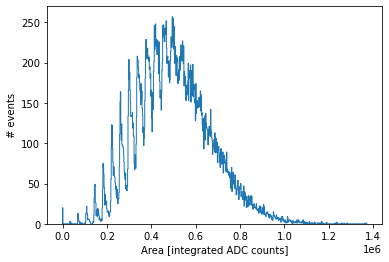

In [28]:
plot_hist_area(df[cut_mask & (df['module'] == 0) & (df['channel'] == 'wf5')])

In [75]:
def plot_area_LED(processed_data, module, channel, LED_position = 300, log_y = True, full_x = False, ax = None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize = (12,6))
        
    df = processed_data.data
    cut_mask = ((df['position'] > (LED_position - 10)) &
                (df['position'] < (LED_position + 20)) &
                (df['length'] > 3) &
                (df['module'] == module) &
                (df['channel'] == channel))
    ax = plot_hist_area(df[cut_mask], ax = ax)
    if full_x:
        ax.set_xlim(0,2**14*10*300)
    if log_y:
        ax.set_yscale('log')
    ax.set_title(f'LED ON: module {module}; channel {channel[-1]}') 
    return np.median(df[cut_mask])

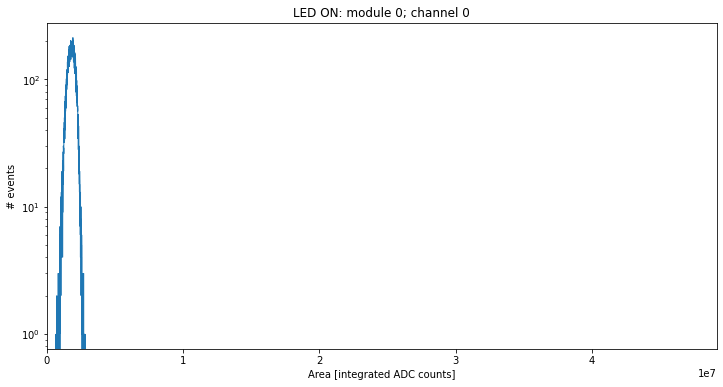

In [74]:
plot_area_LED(processed_data, 0, 'wf0', full_x = True, log_y= True)

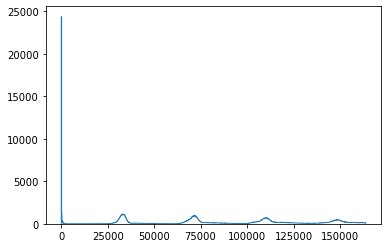

In [20]:
plt.hist(df[cut_mask]['area'], bins = np.linspace(0,2**14*10,1000), histtype = 'step')
plt.show()

## With its specific class

In [39]:
bv_170K_0_0 = pylars.analysis.BV_dataset(run = base_run, 
                                         temperature = 170,
                                         module = 0,
                                         channel = 'wf0',
                                         processor = process)

In [42]:
bv_170K_0_0.__dict__

{'run': Run 6,
 'temp': 170,
 'module': 0,
 'channel': 'wf0',
 'process': <pylars.processing.rawprocessor.run_processor at 0x7f59f5f92f70>,
 'voltages': array([46.  , 46.25, 46.5 , 46.75, 47.  , 47.25, 47.5 , 47.75, 48.  ,
        48.25, 48.5 , 48.75, 49.  , 49.25, 49.5 , 49.75, 50.  , 50.25,
        50.5 , 50.75, 51.  , 51.25, 51.5 , 51.75, 52.  , 52.25, 52.5 ])}

In [44]:
bv_170K_0_0.load_processed_data()

Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_46.00-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_46.25-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_46.50-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_46.75-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_47.00-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_47.25-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_47.50-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_47.75-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170.00_48.00-3iertgj.h5
Loaded file:  /disk/gfs_atp/xenoscope/SiPMs/char_campai

In [46]:
data_dict = bv_170K_0_0.data

In [57]:
bv_170K_0_0.module

0

In [58]:
from pylars.plotting.plotprocessed import *
from pylars.plotting.plotanalysis import *

In [64]:
boop = bv_170K_0_0.data[50]

In [66]:
beep = ((boop['position'] > (300 - 10)) &
                (boop['position'] < (300 + 20)) &
                (boop['length'] > 3))

In [67]:
boop[beep]

,module,channel,wf_number,peak_number,area,length,position
0,0,wf0,0,0,1961480.0,70,305
7,0,wf0,1,0,1594660.0,69,307
15,0,wf0,2,0,1992020.0,79,306
21,0,wf0,3,0,1328015.0,68,305
25,0,wf0,4,0,1989140.0,97,305
...,...,...,...,...,...,...,...
226709,0,wf0,49995,0,1621800.0,75,306
226715,0,wf0,49996,0,1847070.0,67,306
226718,0,wf0,49997,0,1458050.0,73,305
226724,0,wf0,49998,0,2161200.0,87,305


In [82]:
cm = plt.colormaps.get('winter')

In [84]:
cm(0.1)

(0.0, 0.09803921568627451, 0.9509803921568627, 1.0)

In [102]:
cm(12/N_lines)

(0.0, 0.44313725490196076, 0.7784313725490196, 1.0)

ValueError: 0.0 is not a valid value for color

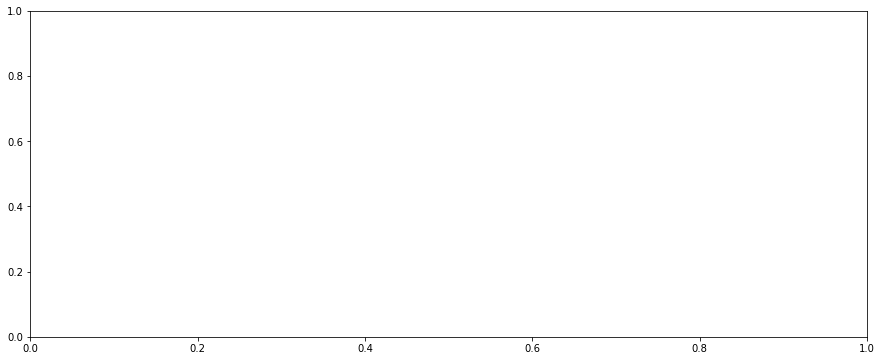

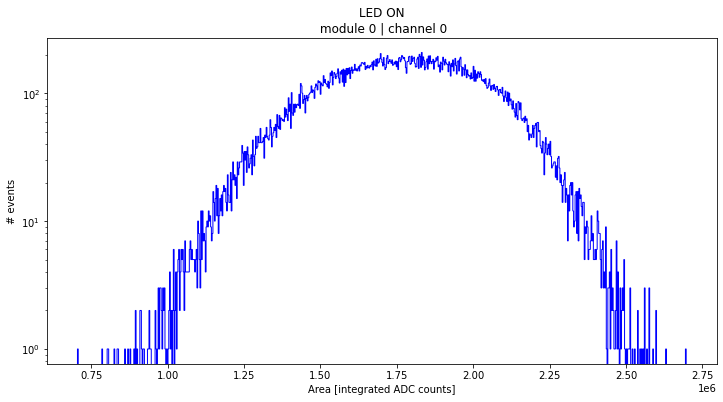

In [94]:
cm = plt.get_cmap('winter')
N_lines = len(bv_170K_0_0.voltages)

fig, ax = plt.subplots(1,1,figsize = (15,6))
for i, _v in enumerate(bv_170K_0_0.voltages):
    
    med, med_err, ax = plot_area_LED(bv_170K_0_0, 50, color = cm(i/N_lines))
    ax.axvline(med, color = i/N_lines)
plt.show()

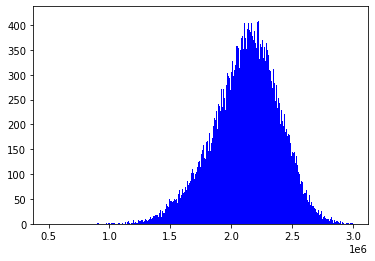

In [105]:
plt.hist(bv_170K_0_0.data[51]['area'], 
         bins = np.linspace(0.5e6,3e6,500), color = cm(0))
plt.show()